In [18]:
import nltk

In [19]:
import pandas as pd
df = pd.read_csv('./dataset.csv')

In [20]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,name,description,activity,status,tag
0,Еда & Кофе,"Если Вы любите вкусный кофе, авторский чай или...",Coffee Shop,NaN,food
1,ДЕВОЧКИ И КОСМЕТИКА,"Душой в Сефоре, телом в Фикспрайсе",Personal care,ТВОЯ ЛЮБОВЬ🖤,cosmetics
2,Poizon Shop,Товары из Poizon в наличии и под заказ.\nС нам...,"Clothing, shoes",Доставка любых вещей с POIZON 🔥,clothes
3,Сеть кинотеатров КАРО,КАРО — это 31 кинотеатр нового поколения в Мос...,Movie theater,Объединяем киноманов по всей России! 🍿,events
4,808.media,"Гаджеты, электромобили, технологии и не только...","Technology, electronics",Обзоры для ребятушек,tech


In [21]:
for i in df.index:
  if df.loc[i, 'tag'] not in ['food', 'cosmetics', 'games']:
    df = df.drop(index=i)
df.head()

,name,description,activity,status,tag
0,Еда & Кофе,"Если Вы любите вкусный кофе, авторский чай или...",Coffee Shop,NaN,food
1,ДЕВОЧКИ И КОСМЕТИКА,"Душой в Сефоре, телом в Фикспрайсе",Personal care,ТВОЯ ЛЮБОВЬ🖤,cosmetics
5,TRUE GAMERS l Железнодорожныйl Компьютерный клуб,"TRUE GAMERS - кибер-арена, из которой тебе НЕ ...",Esports organization,"Мы открыты, работаем 24/7! 🔥",games
7,Еда,«Еда» — мини-приложение для заказа продуктов и...,Food Delivery,Заказывайте любимую еду прямо ВКонтакте,food
8,САДОВОД КОСМЕТИКА,Садовод 6-линия 68 павильон \n+7 995 941-76-...,"Perfume, Cosmetics",Садовод 6 линия 68 павильон https://vk.com/id5...,cosmetics


In [22]:
df.isna().sum()

name            0
description     5
activity        0
status         22
tag             0
dtype: int64

In [23]:
df = df.dropna()
df.isna().sum()

name           0
description    0
activity       0
status         0
tag            0
dtype: int64

In [24]:
df.describe()

,name,description,activity,status,tag
count,64,64,64,64,64
unique,64,64,18,64,3
top,ДЕВОЧКИ И КОСМЕТИКА,"Душой в Сефоре, телом в Фикспрайсе","Perfume, Cosmetics",ТВОЯ ЛЮБОВЬ🖤,cosmetics
freq,1,1,14,1,24


In [48]:
df.to_csv('new/dataset.csv')

In [25]:
X = df.drop(columns='tag')
y = df['tag']
X.head(), y.head()

(                                                name  \
 1                                ДЕВОЧКИ И КОСМЕТИКА   
 5   TRUE GAMERS l Железнодорожныйl Компьютерный клуб   
 7                                                Еда   
 8                                  САДОВОД КОСМЕТИКА   
 12                                        MAGIC RUST   
 
                                           description              activity  \
 1                  Душой в Сефоре, телом в Фикспрайсе         Personal care   
 5   TRUE GAMERS - кибер-арена, из которой тебе НЕ ...  Esports organization   
 7   «Еда» — мини-приложение для заказа продуктов и...         Food Delivery   
 8   Садовод  6-линия 68 павильон  \n+7 995 941-76-...    Perfume, Cosmetics   
 12  Последний вайп на Friday: 17.11.2023 в 14:00 с...           Video games   
 
                                                status  
 1                                        ТВОЯ ЛЮБОВЬ🖤  
 5                        Мы открыты, работаем 24/7! 🔥  
 7 

In [26]:
for column in X.columns:
    X.loc[:, column] = X[column].apply(lambda x: x.lower())
X.head()

,name,description,activity,status
1,девочки и косметика,"душой в сефоре, телом в фикспрайсе",personal care,твоя любовь🖤
5,true gamers l железнодорожныйl компьютерный клуб,"true gamers - кибер-арена, из которой тебе не ...",esports organization,"мы открыты, работаем 24/7! 🔥"
7,еда,«еда» — мини-приложение для заказа продуктов и...,food delivery,заказывайте любимую еду прямо вконтакте
8,садовод косметика,садовод 6-линия 68 павильон \n+7 995 941-76-...,"perfume, cosmetics",садовод 6 линия 68 павильон https://vk.com/id5...
12,magic rust,последний вайп на friday: 17.11.2023 в 14:00 с...,video games,твой выбор


In [27]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np

In [28]:
for column in X.columns:
    X.loc[:, column] = X[column].apply(word_tokenize)
X.head()

,name,description,activity,status
1,"[девочки, и, косметика]","[душой, в, сефоре, ,, телом, в, фикспрайсе]","[personal, care]","[твоя, любовь🖤]"
5,"[true, gamers, l, железнодорожныйl, компьютерн...","[true, gamers, -, кибер-арена, ,, из, которой,...","[esports, organization]","[мы, открыты, ,, работаем, 24/7, !, 🔥]"
7,[еда],"[«, еда, », —, мини-приложение, для, заказа, п...","[food, delivery]","[заказывайте, любимую, еду, прямо, вконтакте]"
8,"[садовод, косметика]","[садовод, 6-линия, 68, павильон, +7, 995, 941-...","[perfume, ,, cosmetics]","[садовод, 6, линия, 68, павильон, https, :, //..."
12,"[magic, rust]","[последний, вайп, на, friday, :, 17.11.2023, в...","[video, games]","[твой, выбор]"


In [29]:
from string import punctuation
def rm_punct(arr: np.array):
  return np.array([word for word in arr if word not in punctuation])

In [30]:
for column in X.columns:
  X.loc[:, column] = X[column].apply(rm_punct)
X.head()

,name,description,activity,status
1,"[девочки, и, косметика]","[душой, в, сефоре, телом, в, фикспрайсе]","[personal, care]","[твоя, любовь🖤]"
5,"[true, gamers, l, железнодорожныйl, компьютерн...","[true, gamers, кибер-арена, из, которой, тебе,...","[esports, organization]","[мы, открыты, работаем, 24/7, 🔥]"
7,[еда],"[«, еда, », —, мини-приложение, для, заказа, п...","[food, delivery]","[заказывайте, любимую, еду, прямо, вконтакте]"
8,"[садовод, косметика]","[садовод, 6-линия, 68, павильон, +7, 995, 941-...","[perfume, cosmetics]","[садовод, 6, линия, 68, павильон, https, //vk...."
12,"[magic, rust]","[последний, вайп, на, friday, 17.11.2023, в, 1...","[video, games]","[твой, выбор]"


In [31]:
rusw = stopwords.words('russian')
ensw = stopwords.words('english')
def rm_sw(arr: np.array):
  return np.array([word for word in arr if word not in rusw and word not in ensw])

In [32]:
for column in X.columns:
  X.loc[:, column] = X[column].apply(rm_sw)
X.head()

,name,description,activity,status
1,"[девочки, косметика]","[душой, сефоре, телом, фикспрайсе]","[personal, care]","[твоя, любовь🖤]"
5,"[true, gamers, l, железнодорожныйl, компьютерн...","[true, gamers, кибер-арена, которой, тебе, зах...","[esports, organization]","[открыты, работаем, 24/7, 🔥]"
7,[еда],"[«, еда, », —, мини-приложение, заказа, продук...","[food, delivery]","[заказывайте, любимую, еду, прямо, вконтакте]"
8,"[садовод, косметика]","[садовод, 6-линия, 68, павильон, +7, 995, 941-...","[perfume, cosmetics]","[садовод, 6, линия, 68, павильон, https, //vk...."
12,"[magic, rust]","[последний, вайп, friday, 17.11.2023, 14:00, ч...","[video, games]","[твой, выбор]"


In [33]:
from pymystem3 import Mystem
mystem = Mystem()
def lemmatize(arr: np.array):
  return np.array([mystem.lemmatize(word)[0] for word in arr])

In [34]:
for column in X.columns:
  X.loc[:, column] = X[column].apply(lemmatize)
X.head()

,name,description,activity,status
1,"[девочка, косметика]","[душа, сефор, тело, фикспрайс]","[personal, care]","[твой, любовь]"
5,"[true, gamers, l, железнодорожныйl, компьютерн...","[true, gamers, кибер, который, ты, захотеться,...","[esports, organization]","[открывать, работать, 24, 🔥]"
7,[еда],"[«\n, еда, »\n, —\n, мини, заказ, продукт, гот...","[food, delivery]","[заказывать, любимый, ехать, прямо, вконтакте]"
8,"[садовод, косметика]","[садовод, 6, 68, павильон, +, 995, 941, +, 926...","[perfume, cosmetics]","[садовод, 6, линия, 68, павильон, https, //]"
12,"[magic, rust]","[последний, вайп, friday, 17.11, 14, чертеж, с...","[video, games]","[твой, выбор]"


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
corpus = []
for row in X.index:
  document = ''
  for column in X.columns:
    document += ' ' + ' '.join(X.loc[row, column])
  corpus.append(document)
corpus[:5]

[' девочка косметика душа сефор тело фикспрайс personal care твой любовь',
 " true gamers l железнодорожныйl компьютерный клуб true gamers кибер который ты захотеться уходить наш телефон + 901 183 находить несколько зона мощный комп буткэмп видео 4060 3080 монитор 360hz 2k 240hz 25 ''\n 27 ''\n 32 ''\n топовый девайса геймерский зона ps c сочный телевизор кресло dxracer ждать 24 esports organization открывать работать 24 🔥",
 ' еда «\n еда »\n —\n мини заказ продукт готовый блюдо доставка ваш здоровый завтрак сытный обед изысканный ужин вкусный перекус отвечать наш давний друг delivery club заказывать любимый ехать прямо вконтакте открывать мини выбирать любой 30 000 ресторан —\n приготавливать хороший акция специальный предложение подсказывать начинаться счастливый часы food delivery заказывать любимый ехать прямо вконтакте',
 ' садовод косметика садовод 6 68 павильон + 995 941 + 926 860 миша perfume cosmetics садовод 6 линия 68 павильон https //',
 ' magic rust последний вайп friday 

In [37]:
corpus = pd.Series(corpus)
corpus.describe()

count                                                    64
unique                                                   64
top        девочка косметика душа сефор тело фикспрайс p...
freq                                                      1
dtype: object

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
# X.describe()

In [40]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3)
res = svd.fit_transform(X)
res[:5]

array([[ 0.15133127, -0.07382166, -0.14870224],
       [ 0.05136773, -0.00297537,  0.00121149],
       [ 0.22045406,  0.33519186,  0.01911236],
       [ 0.18591266, -0.12502913, -0.17045187],
       [ 0.01909743, -0.00109672, -0.00198867]])

In [42]:
import matplotlib.pyplot as plt

In [45]:
c = dict(zip(df.tag.unique(), ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']))
c

{'cosmetics': '#1f77b4', 'games': '#ff7f0e', 'food': '#2ca02c'}

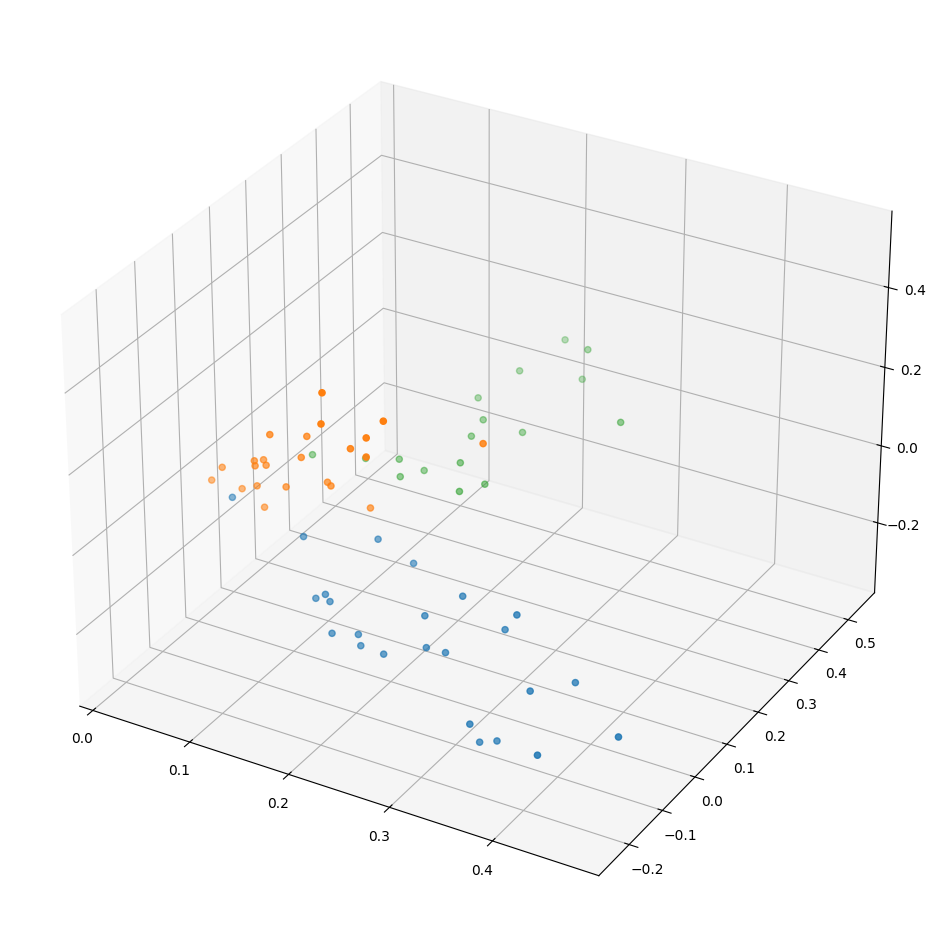

In [46]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(res[:, 0], res[:, 1], res[:, 2],  c=df.tag.map(c))